In [1]:
import cv2
from matplotlib import pyplot as plt
image_file="Images/test.png"
img=cv2.imread(image_file)

In [24]:


def display(image_path):
    dpi = 80
    im_data = plt.imread(image_path)

    # Handle grayscale images correctly
    if len(im_data.shape) == 2:  # Grayscale (no depth channel)
        height, width = im_data.shape
    else:  # Colored image
        height, width, _ = im_data.shape

    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')
    ax.imshow(im_data, cmap="gray" if len(im_data.shape) == 2 else None)
    plt.show()



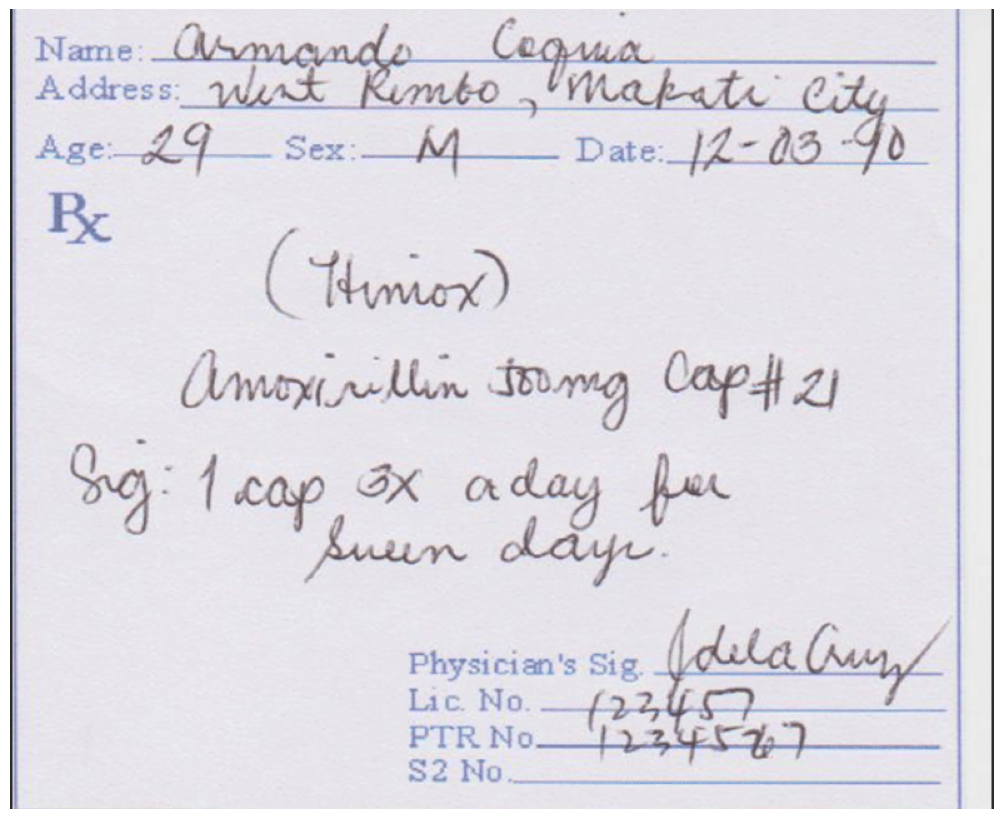

In [25]:
display(image_file)

In [26]:
#grayscale noise reduction threshold deskew dilate&erode edge contrast roi resize
from cv2 import bitwise_not


inverted_img=bitwise_not(img)
cv2.imwrite("temp/inverted.jpg",inverted_img)


True

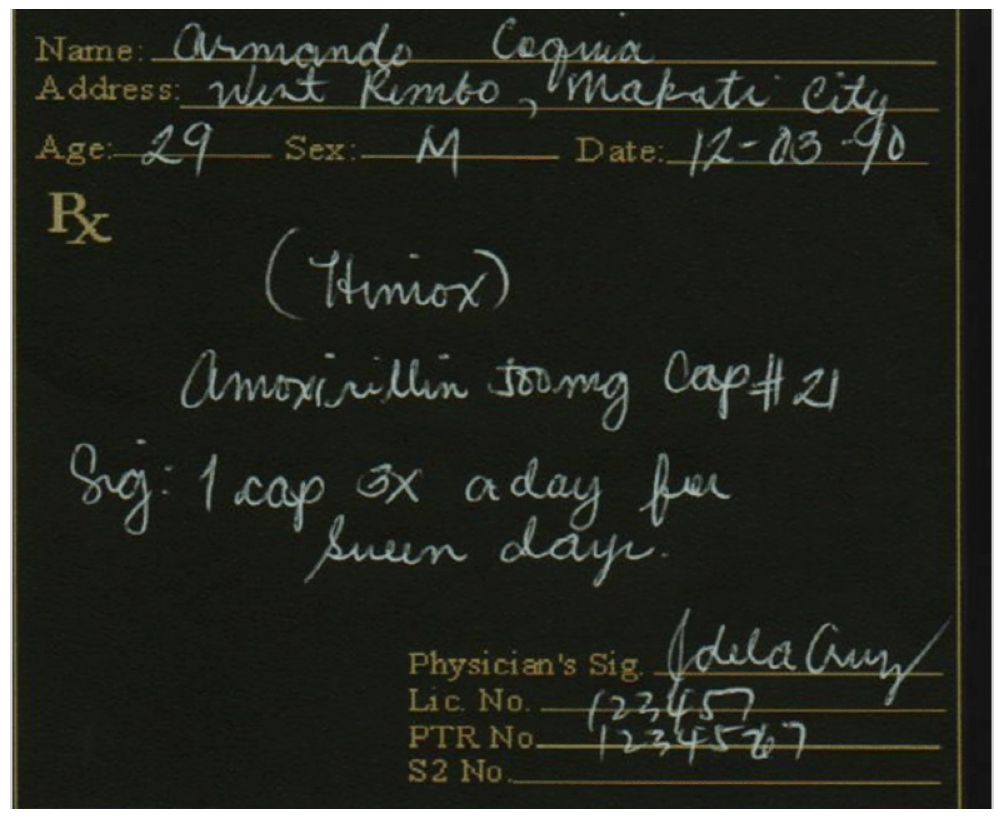

In [27]:
display("temp/inverted.jpg")

In [28]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [29]:
gray_img=grayscale(img)
cv2.imwrite("temp/gray.jpg",gray_img)

True

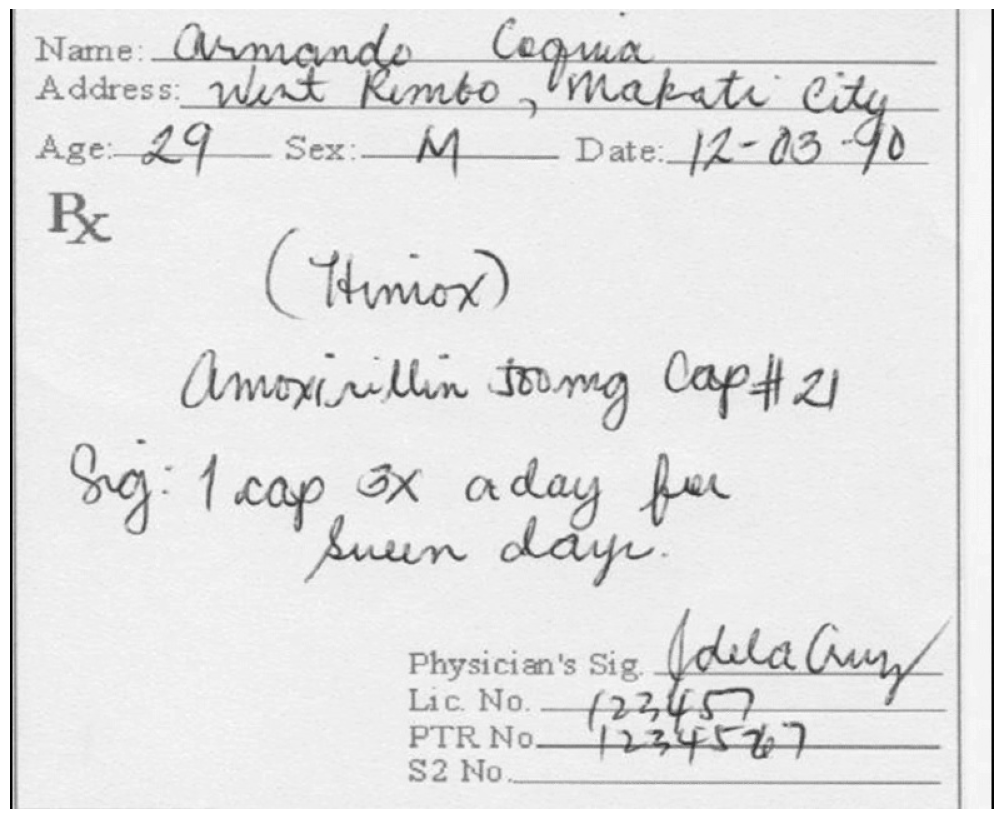

In [31]:
display("temp/gray.jpg")

In [32]:
thresh,im_bw=cv2.threshold(gray_img,200,230,cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg",im_bw)

True

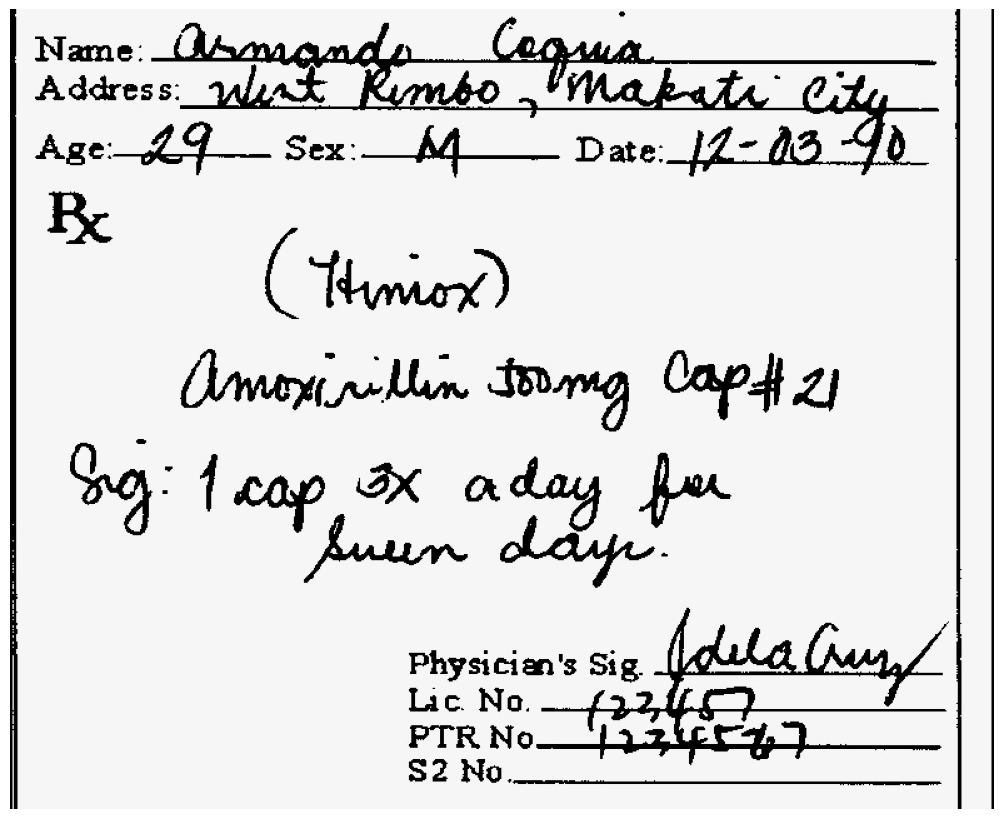

In [33]:
display("temp/bw_image.jpg")

In [34]:
def noise_removal(image):
    import numpy as np
    kernel =np.ones((1,1),np.uint8)
    image=cv2.dilate(image,kernel,iterations=1)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1)
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image=cv2.medianBlur(image,3)
    return image

In [35]:
no_noise=noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg",no_noise)

True

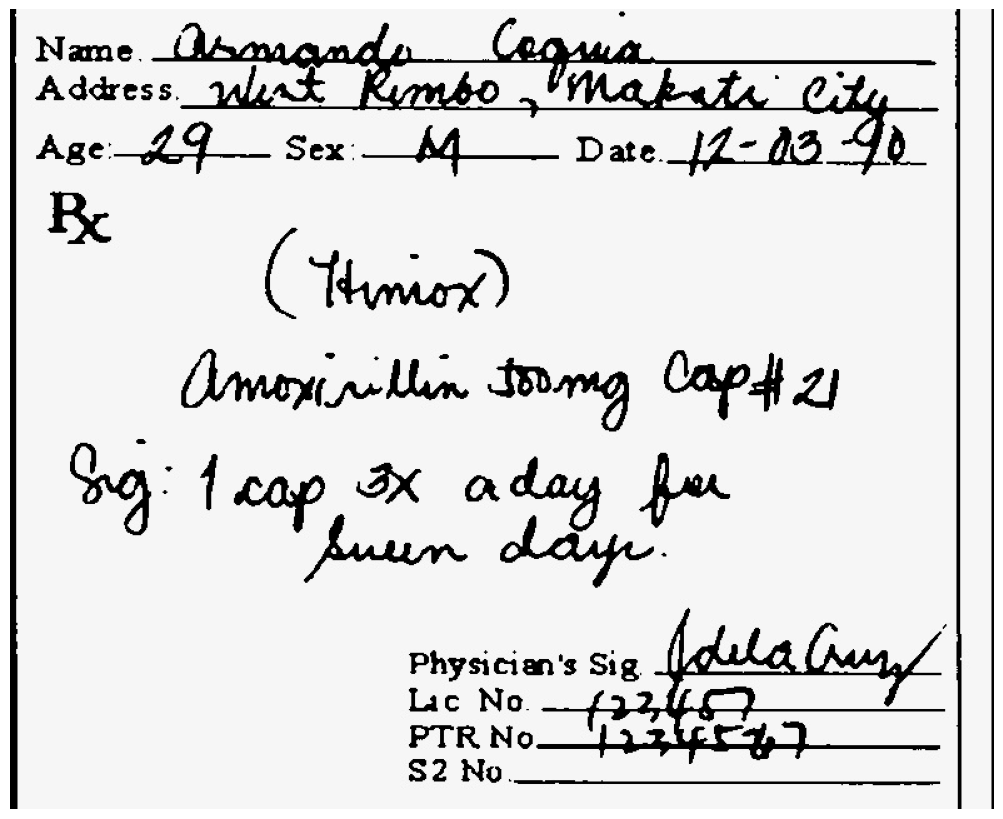

In [37]:
display("temp/no_noise.jpg")

In [44]:
def thin_font(image):
    import numpy as np
    image=cv2.bitwise_not(image)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1)
    image=bitwise_not(image)
    return (image)

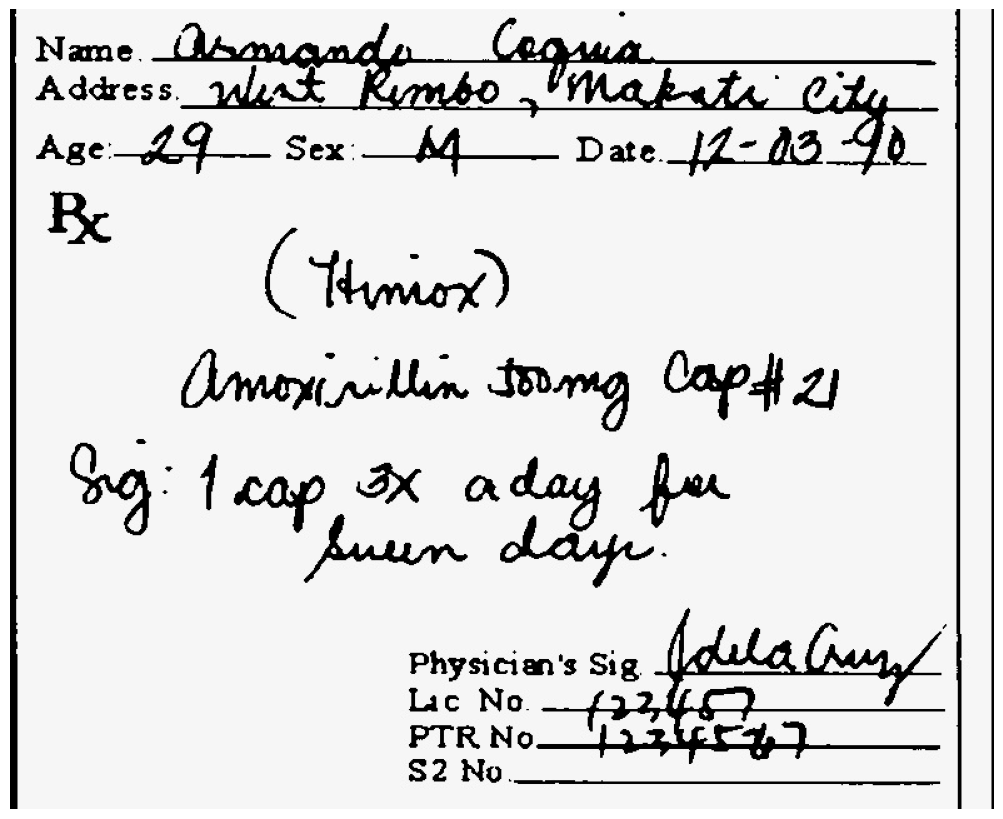

In [45]:
eroded_img=thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg",eroded_img)
display("temp/eroded_image.jpg")
